In [301]:
import numpy as np
from plotnine import *
import pandas as pd

In [302]:
results = pd.read_csv("benchmark_results.csv", sep='\t')

In [303]:
nbse_info = pd.read_csv("nbse_sets.csv")

In [304]:
data = results.merge(nbse_info, left_on=['name'], right_on=['set_name'])
data['mcs_size_to_atom_size'] = data['mcs_atoms'] / data['avg_atoms']
data = data.query('local_similarity > 0 and took < 900')
data.set_index(['name', 'optimizer_steps', 'optimizer_fine', 'optimizer_coarse', 'num_conformers', 'core', 'assemblies'])

,,,,,,,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,divide,set_name,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,avg_atoms_to_mcs,mcs_size_to_atom_size
name,optimizer_steps,optimizer_fine,optimizer_coarse,num_conformers,core,assemblies,,,,,,,,,,,,,,,,
3ke8,100,0.01,0.3,40,mcs,10,18,0.664895,0.629946,2.792387,True,3ke8,17,17,12,11,11,17,14.647,NaN,75.10%,0.751007
2vke,100,0.01,0.3,40,mcs,10,218,0.653470,0.613581,2.697748,True,2vke,42,45,31,34,22,12,33.522,NaN,65.63%,0.656285
1odn,100,0.01,0.3,40,mcs,10,303,0.569305,0.657672,3.152543,True,1odn,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
4dko,100,0.01,0.3,40,mcs,10,43,0.579109,0.458960,4.240663,True,4dko,30,33,23,24,15,13,26.077,NaN,57.52%,0.575220
3qqs,100,0.01,0.3,40,mcs,10,48,0.619915,0.311268,5.187691,True,3qqs,29,31,10,10,8,19,14.789,NaN,54.09%,0.540943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3g5h,100,0.20,0.5,20,mcs,10,56,0.479303,0.392778,4.959301,True,3g5h,27,30,12,13,6,18,19.222,NaN,31.21%,0.312142
3tfu,100,0.20,0.5,20,mcs,10,14,0.345030,0.481296,5.599819,True,3tfu,28,30,11,12,6,13,19.462,NaN,30.83%,0.308293
3id8,100,0.20,0.5,20,mcs,10,159,0.308676,0.538214,6.718176,True,3id8,37,41,19,21,9,12,29.333,NaN,30.68%,0.306822


In [305]:
data.describe()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,mcs_size_to_atom_size
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,0.0,281.000000
mean,126.163701,0.518069,0.469578,4.096005,0.433096,0.045302,25.729537,6.989324,100.0,31.508897,34.067616,15.291815,15.935943,9.338078,17.110320,22.646367,NaN,0.413793
std,107.337094,0.096528,0.110058,1.385275,0.094533,0.061806,15.127487,4.253976,0.0,8.331144,9.343392,4.829992,5.519720,3.551098,6.143981,5.599728,NaN,0.114119
min,1.000000,0.307021,0.174775,1.647598,0.300000,0.010000,10.000000,1.000000,100.0,12.000000,12.000000,9.000000,9.000000,4.000000,12.000000,10.769000,NaN,0.298533
25%,42.000000,0.452224,0.392778,2.916239,0.300000,0.010000,20.000000,1.000000,100.0,26.000000,29.000000,11.000000,11.000000,7.000000,13.000000,19.176000,NaN,0.318590
50%,101.000000,0.534645,0.481296,3.914539,0.500000,0.010000,20.000000,10.000000,100.0,30.000000,32.000000,14.000000,15.000000,9.000000,15.000000,21.560000,NaN,0.375834
75%,180.000000,0.594573,0.538214,5.187691,0.500000,0.050000,30.000000,10.000000,100.0,37.000000,41.000000,18.000000,20.000000,11.000000,19.000000,26.077000,NaN,0.475160
max,851.000000,0.719335,0.737755,8.482188,0.500000,0.200000,60.000000,10.000000,100.0,73.000000,80.000000,31.000000,34.000000,22.000000,40.000000,37.294000,NaN,0.751007


In [306]:
metrics = data.drop(columns=['set_name', 'name', 'divide', 'core', 'mcs_bonds', 'avg_atoms_to_mcs'])
metrics.var()

took                           11521.251678
local_similarity                   0.009318
avg_conformer_tanimoto_dist        0.012113
siena_rmsd                         1.918986
optimizer_coarse                   0.008936
optimizer_fine                     0.003820
num_conformers                   228.840874
assemblies                        18.096314
optimizer_steps                    0.000000
most_atoms                        69.407956
most_bonds                        87.298983
least_atoms                       23.328826
least_bonds                       30.467311
mcs_atoms                         12.610295
num_mols                          37.748500
avg_atoms                         31.356952
mcs_size_to_atom_size              0.013023
dtype: float64

In [307]:
metrics.head()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_size_to_atom_size
0,18,0.664895,0.629946,2.792387,0.3,0.01,40,10,100,17,17,12,11,11,17,14.647,0.751007
1,218,0.653470,0.613581,2.697748,0.3,0.01,40,10,100,42,45,31,34,22,12,33.522,0.656285
2,303,0.569305,0.657672,3.152543,0.3,0.01,40,10,100,30,29,18,17,15,28,24.251,0.618531
3,43,0.579109,0.458960,4.240663,0.3,0.01,40,10,100,30,33,23,24,15,13,26.077,0.575220
4,48,0.619915,0.311268,5.187691,0.3,0.01,40,10,100,29,31,10,10,8,19,14.789,0.540943


In [308]:
correlations = metrics.corr(method='spearman')
correlations.head()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_size_to_atom_size
took,1.000000,-0.363644,0.046117,0.253936,-0.139249,-0.047504,0.002317,0.092337,NaN,0.444524,0.399400,0.308227,0.268253,0.077787,0.411250,0.309539,-0.210946
local_similarity,-0.363644,1.000000,-0.095814,-0.799346,-0.017342,0.006146,0.023360,0.023618,NaN,-0.491602,-0.511658,-0.193186,-0.261069,0.119132,0.029527,-0.377499,0.595007
avg_conformer_tanimoto_dist,0.046117,-0.095814,1.000000,0.064731,-0.012832,0.000546,0.020425,0.013390,NaN,0.368694,0.325675,0.656622,0.643175,0.599366,-0.221917,0.626621,0.106336
siena_rmsd,0.253936,-0.799346,0.064731,1.000000,-0.009578,-0.004371,0.003603,0.005114,NaN,0.445519,0.484351,0.125963,0.200859,-0.160164,0.036606,0.242388,-0.481589
optimizer_coarse,-0.139249,-0.017342,-0.012832,-0.009578,1.000000,0.486989,0.092769,-0.502674,NaN,-0.004380,-0.004381,0.005791,0.005794,-0.002346,0.001596,-0.004372,0.004931


In [309]:
corr = correlations.stack().reset_index()
corr.columns = ['var1', 'var2', 'val']

metric_cols = ['took', 'siena_rmsd', 'avg_conformer_tanimoto_dist', 'local_similarity']
program_parameters = ['assemblies', 'num_conformers', 'optimizer_coarse', 'optimizer_fine', 'optimizer_steps']
set_props = [str(c) for c in nbse_info.columns ] + ['mcs_size_to_atom_size']

corr_config = corr[corr['var2'].isin(metric_cols)]
corr_config = corr_config[corr['var1'].isin(set_props)]
corr_config = corr_config.round({'val': 3})

/tmp/ipykernel_6262/390824727.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


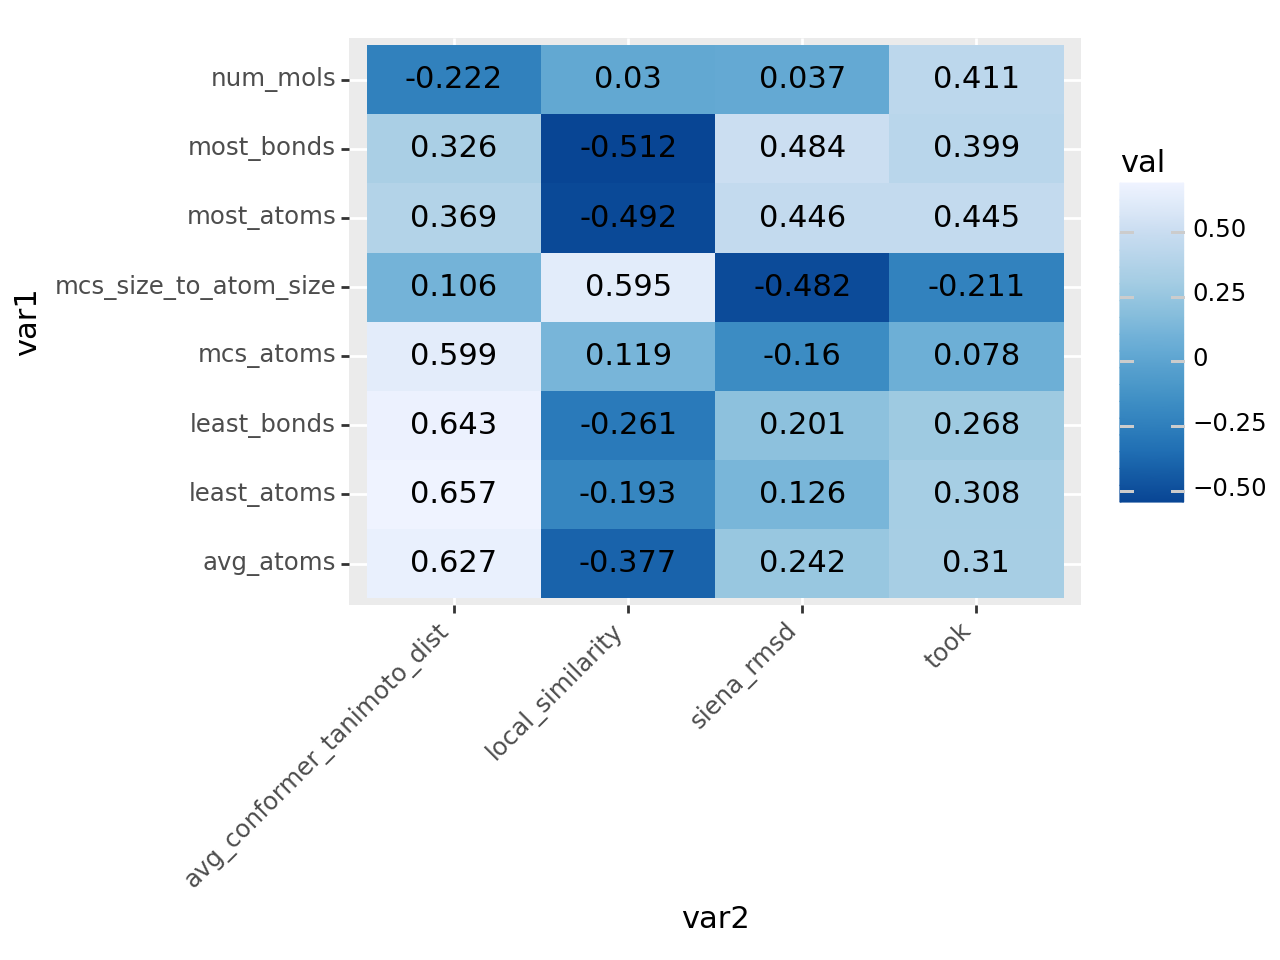

<Figure Size: (640 x 480)>

In [310]:
(ggplot(corr_config, mapping=aes('var2', 'var1', fill='val', label='val'))
 + geom_tile()
 + scale_fill_distiller()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 )

In [311]:
corr_metrics = corr[corr['var1'].isin(metric_cols) & corr['var2'].isin(metric_cols)]
corr_metrics = corr_metrics.round({'val': 3})

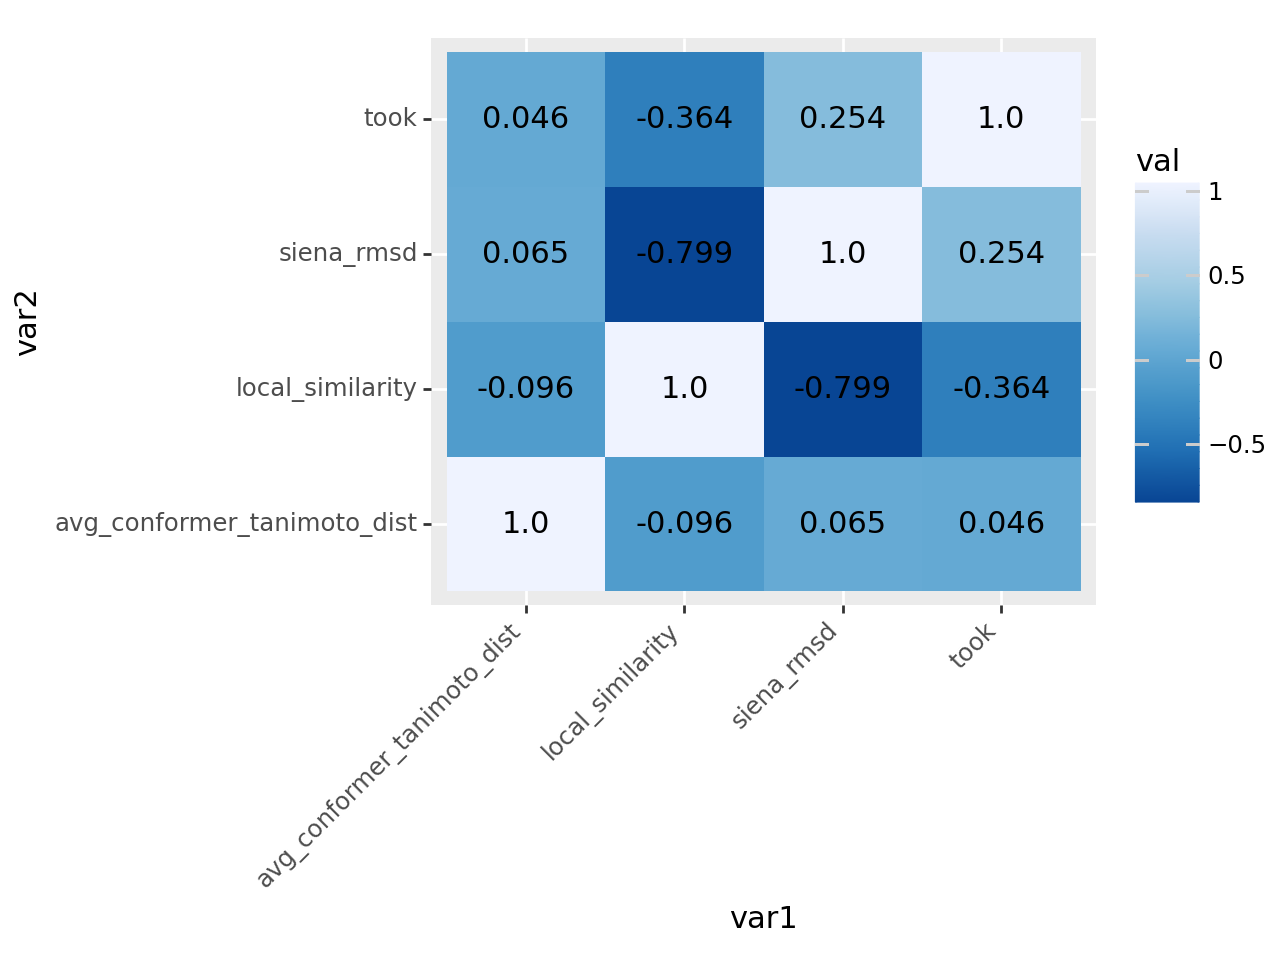

<Figure Size: (640 x 480)>

In [312]:
(ggplot(corr_metrics, mapping=aes('var1', 'var2', fill='val', label='val'))
 + geom_tile()
 + scale_fill_distiller()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 )

In [313]:
corr_options = corr[corr['var1'].isin(program_parameters) & corr['var2'].isin(metric_cols)]
corr_options = corr_options.round({'val': 3})


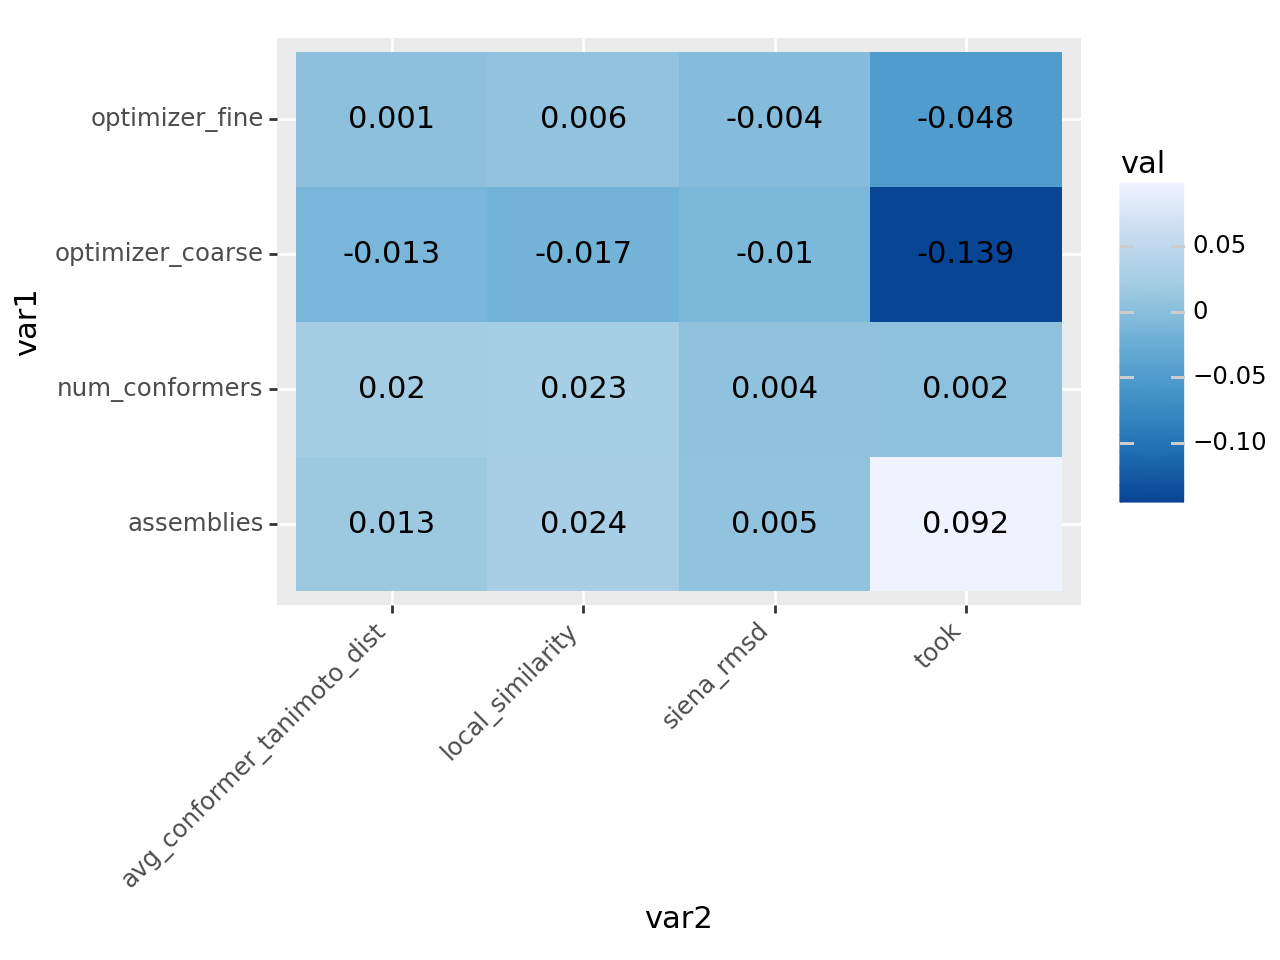

<Figure Size: (640 x 480)>

In [314]:
(ggplot(corr_options, mapping=aes('var2', 'var1', fill='val', label='val'))
 + geom_tile()
 + scale_fill_distiller()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 )


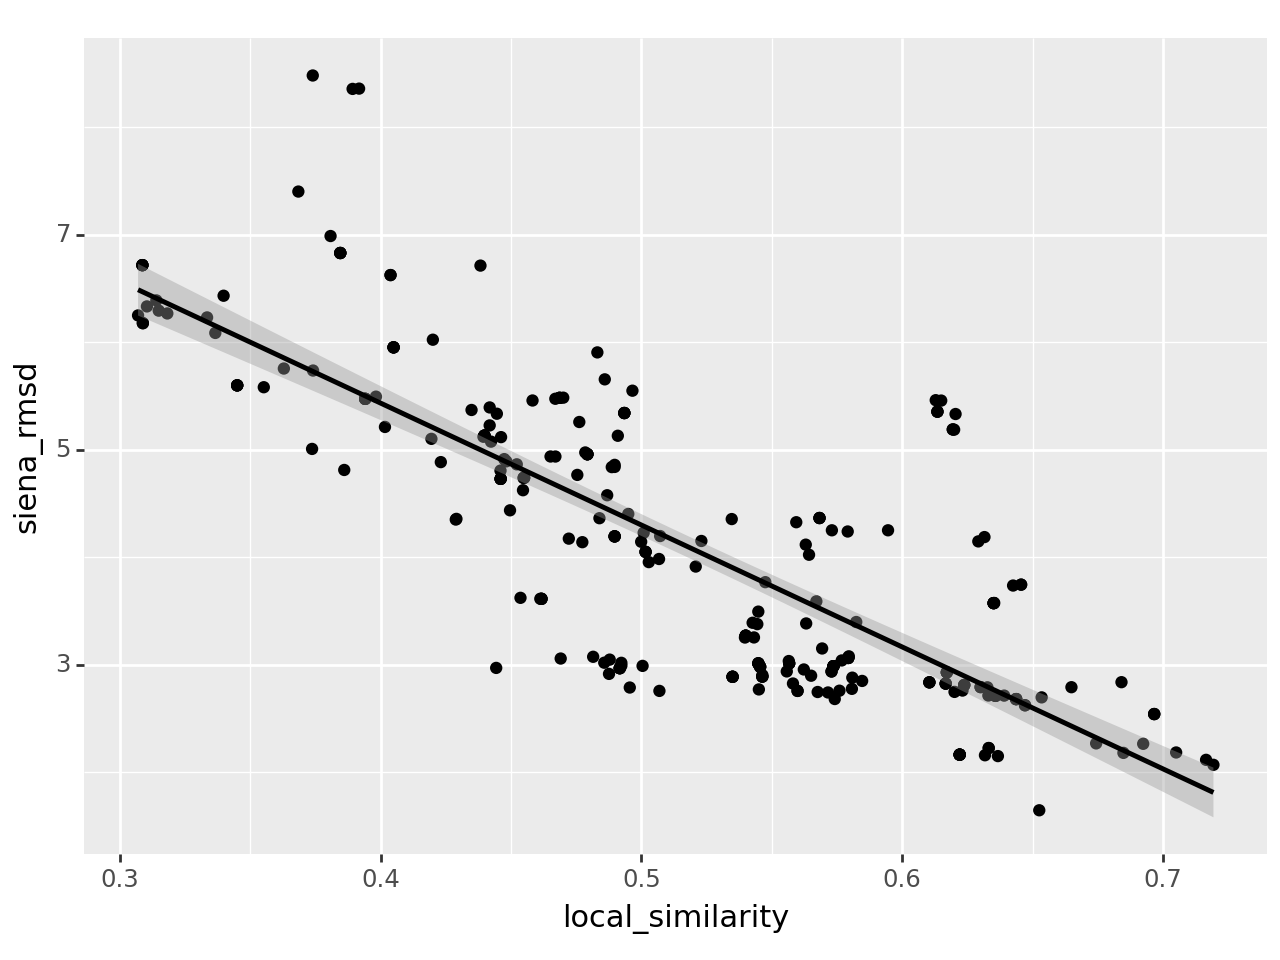

<Figure Size: (640 x 480)>

In [315]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))

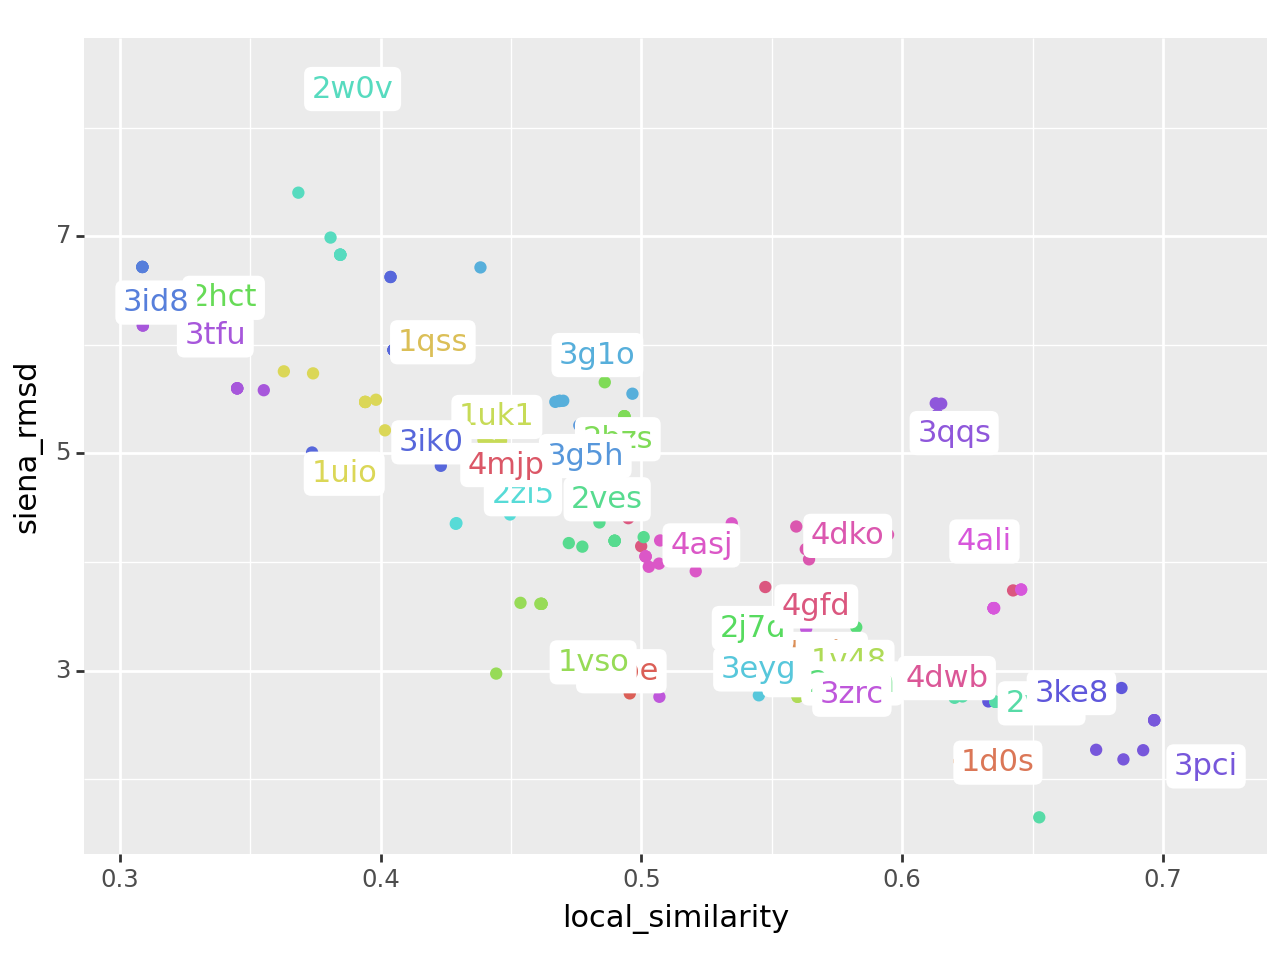

<Figure Size: (640 x 480)>

In [316]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 + scale_color_discrete(guide=False)
 )


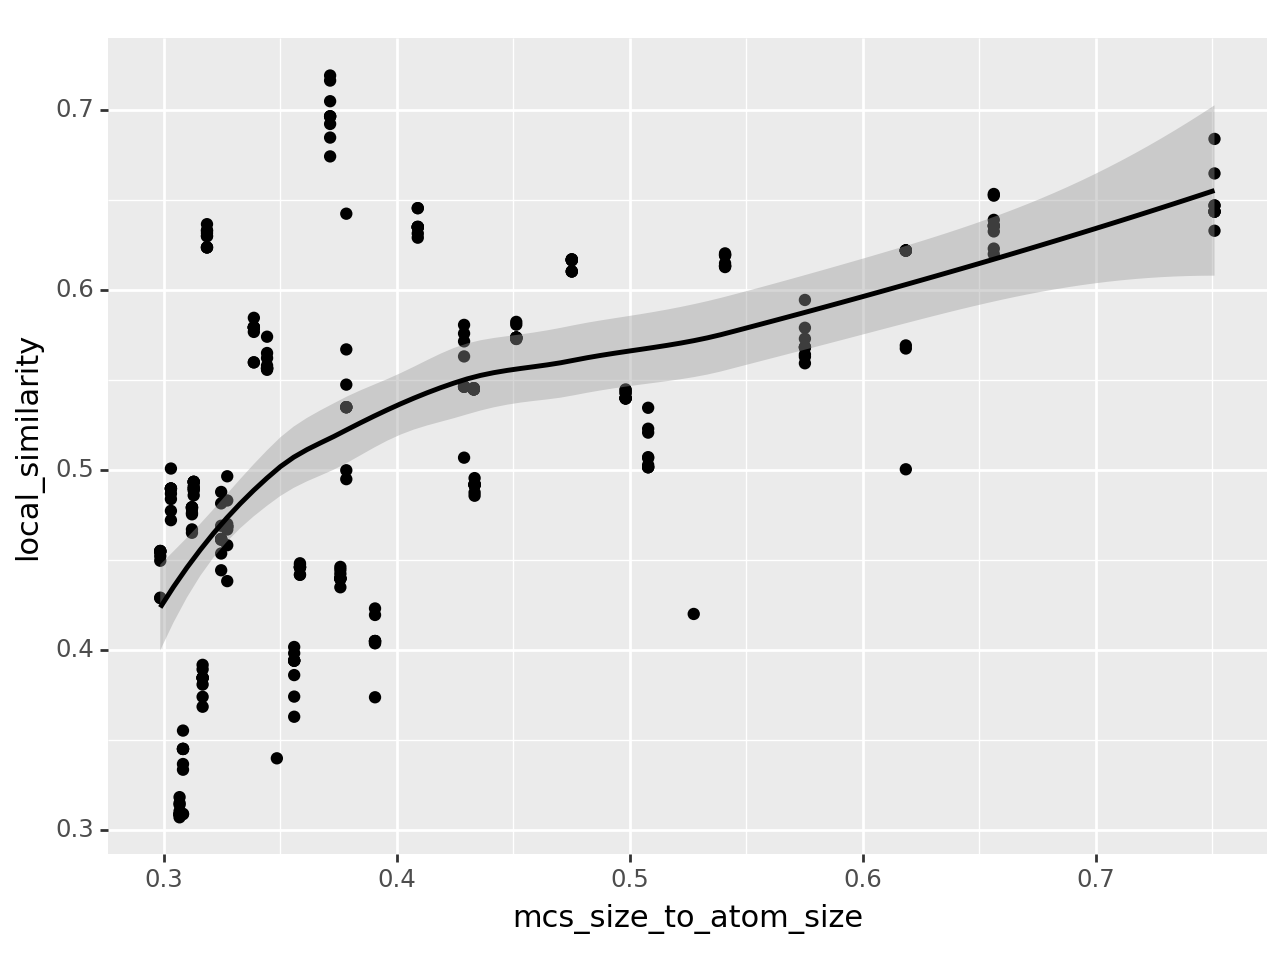

<Figure Size: (640 x 480)>

In [317]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity'))
 + geom_point()
 + geom_smooth(method='loess'))

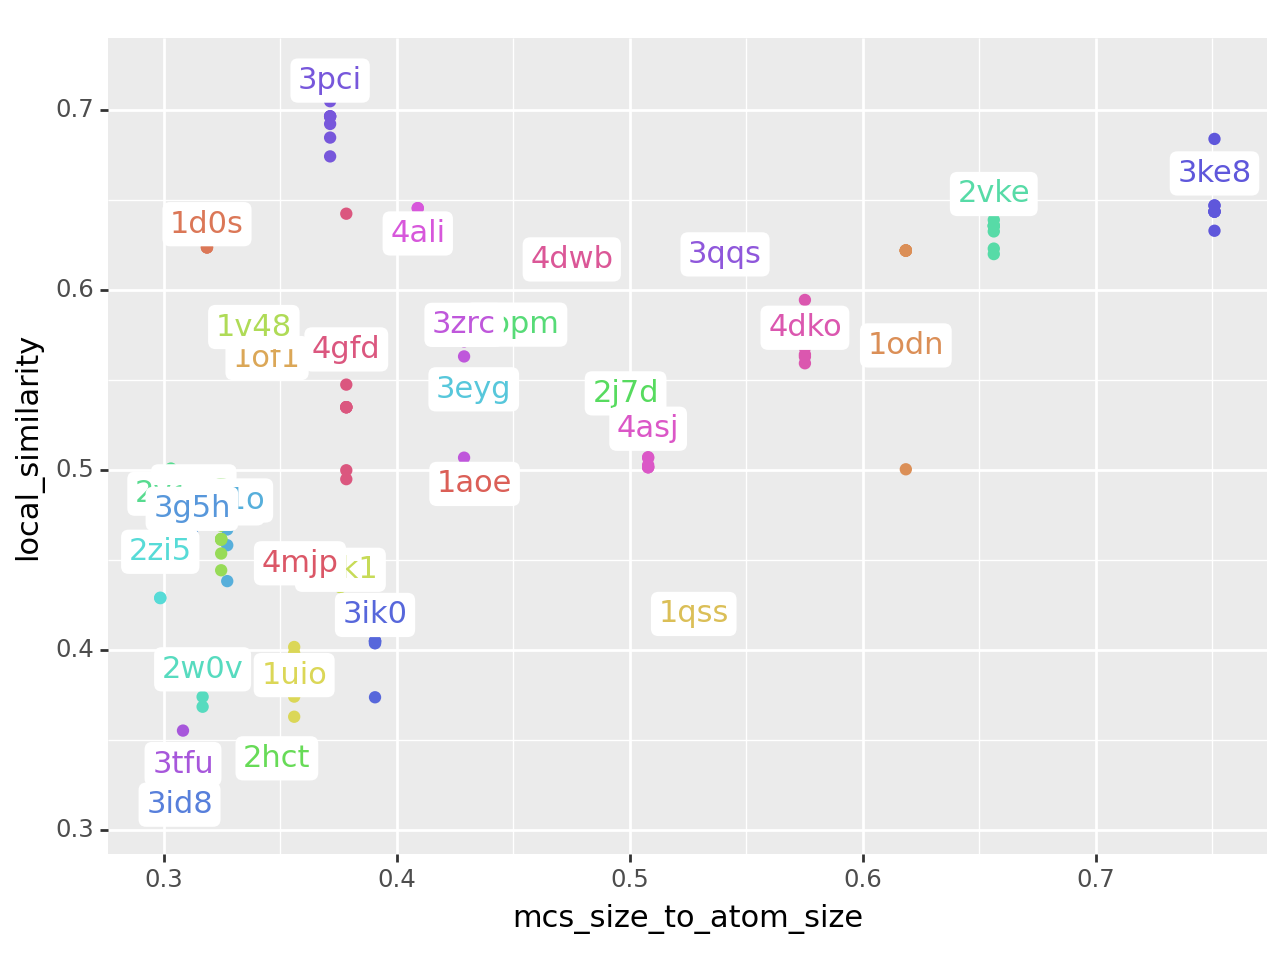

<Figure Size: (640 x 480)>

In [318]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


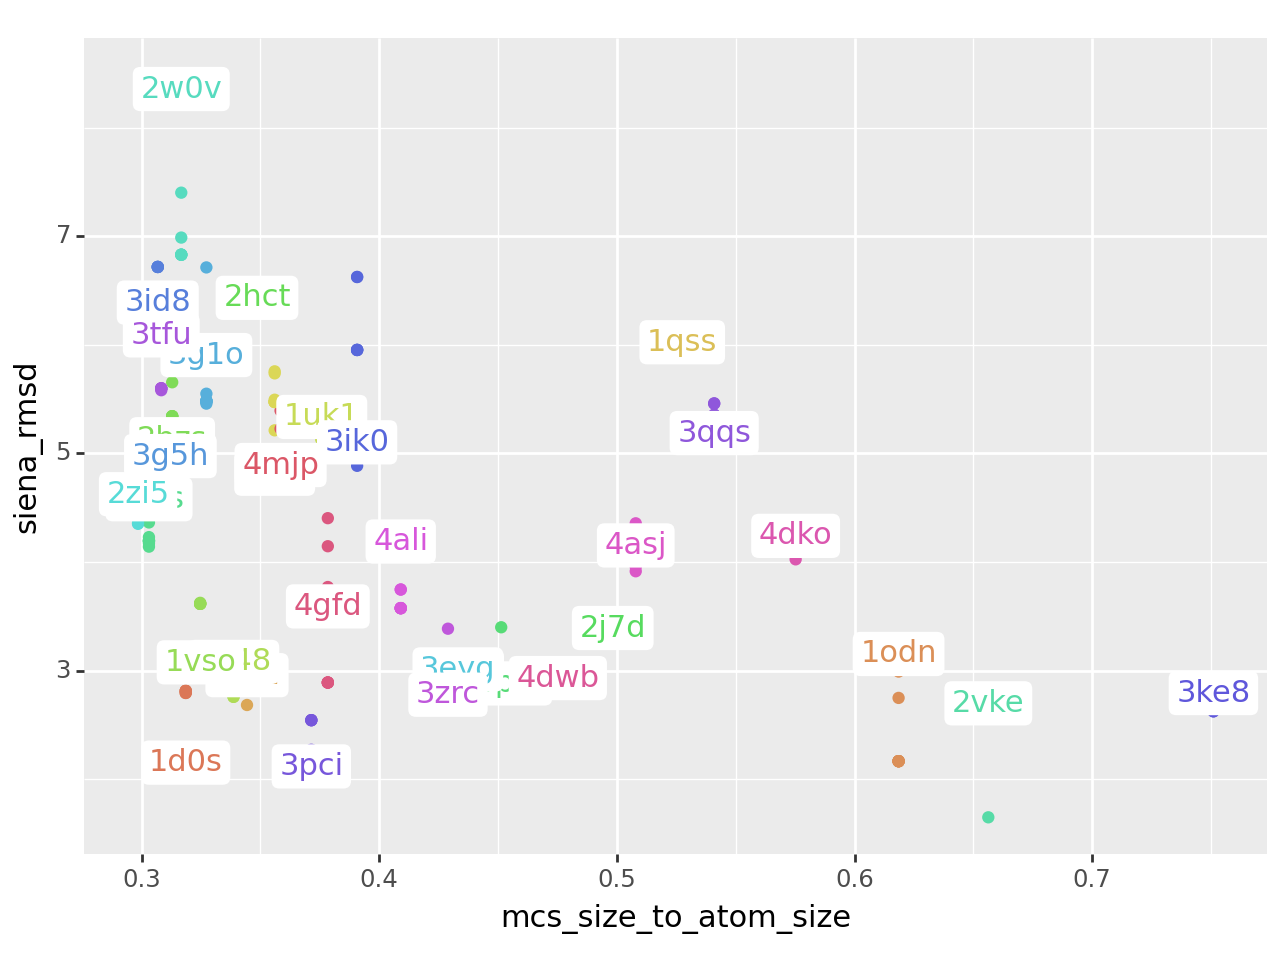

<Figure Size: (640 x 480)>

In [319]:

(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


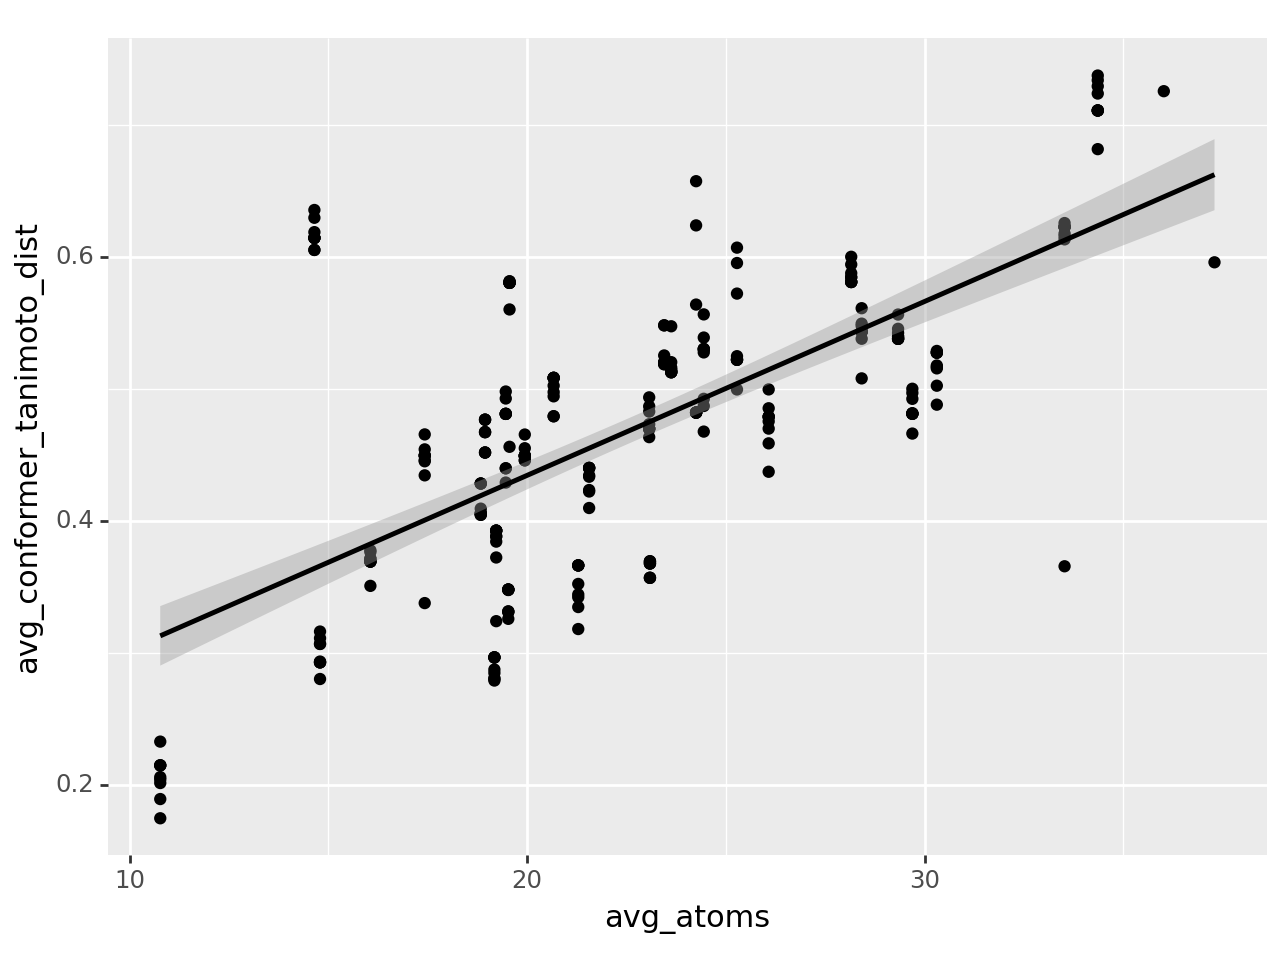

<Figure Size: (640 x 480)>

In [320]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist'))
 + geom_point()
 + geom_smooth(method='lm'))

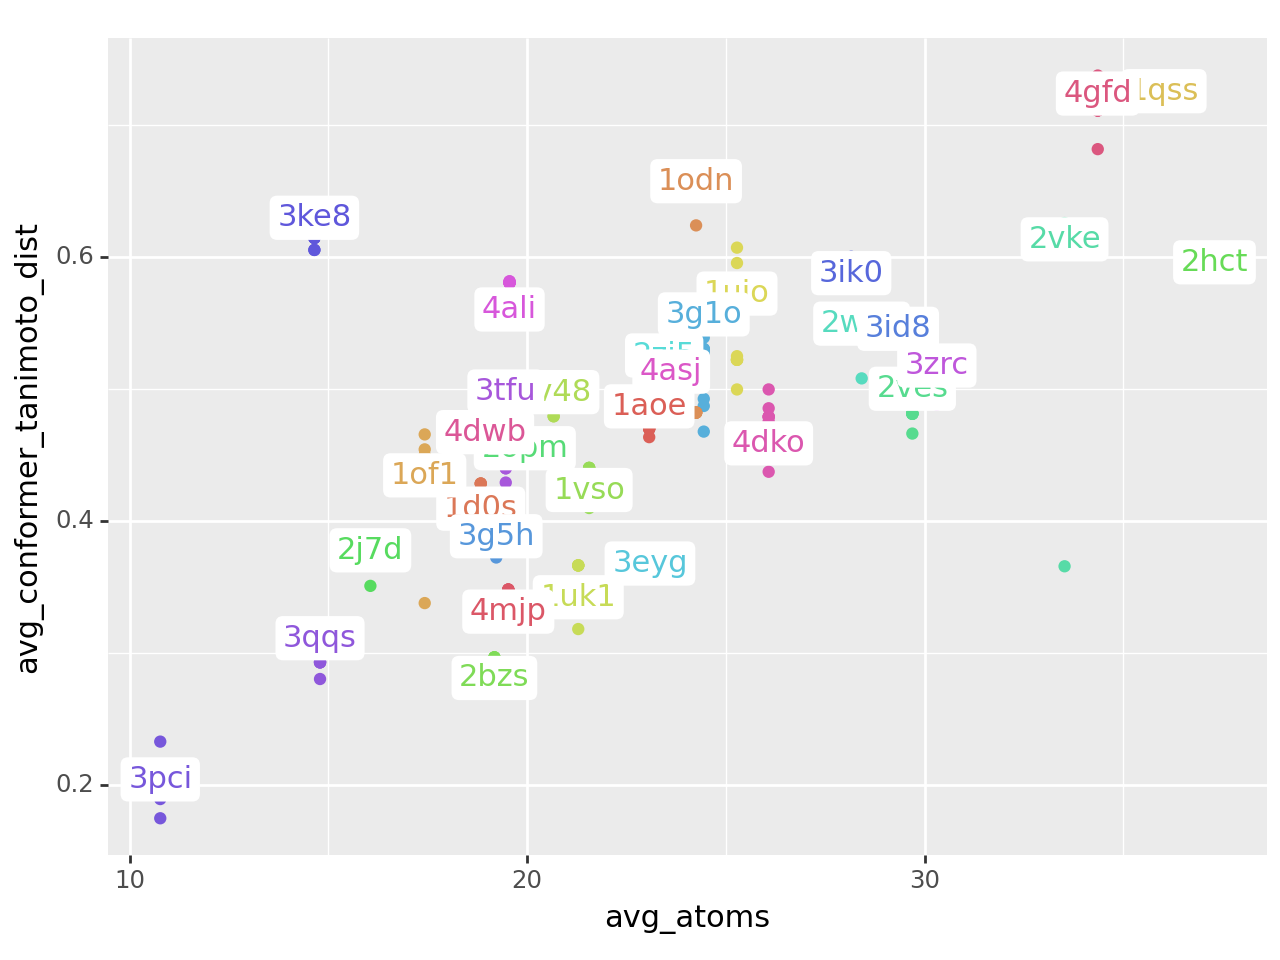

<Figure Size: (640 x 480)>

In [321]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


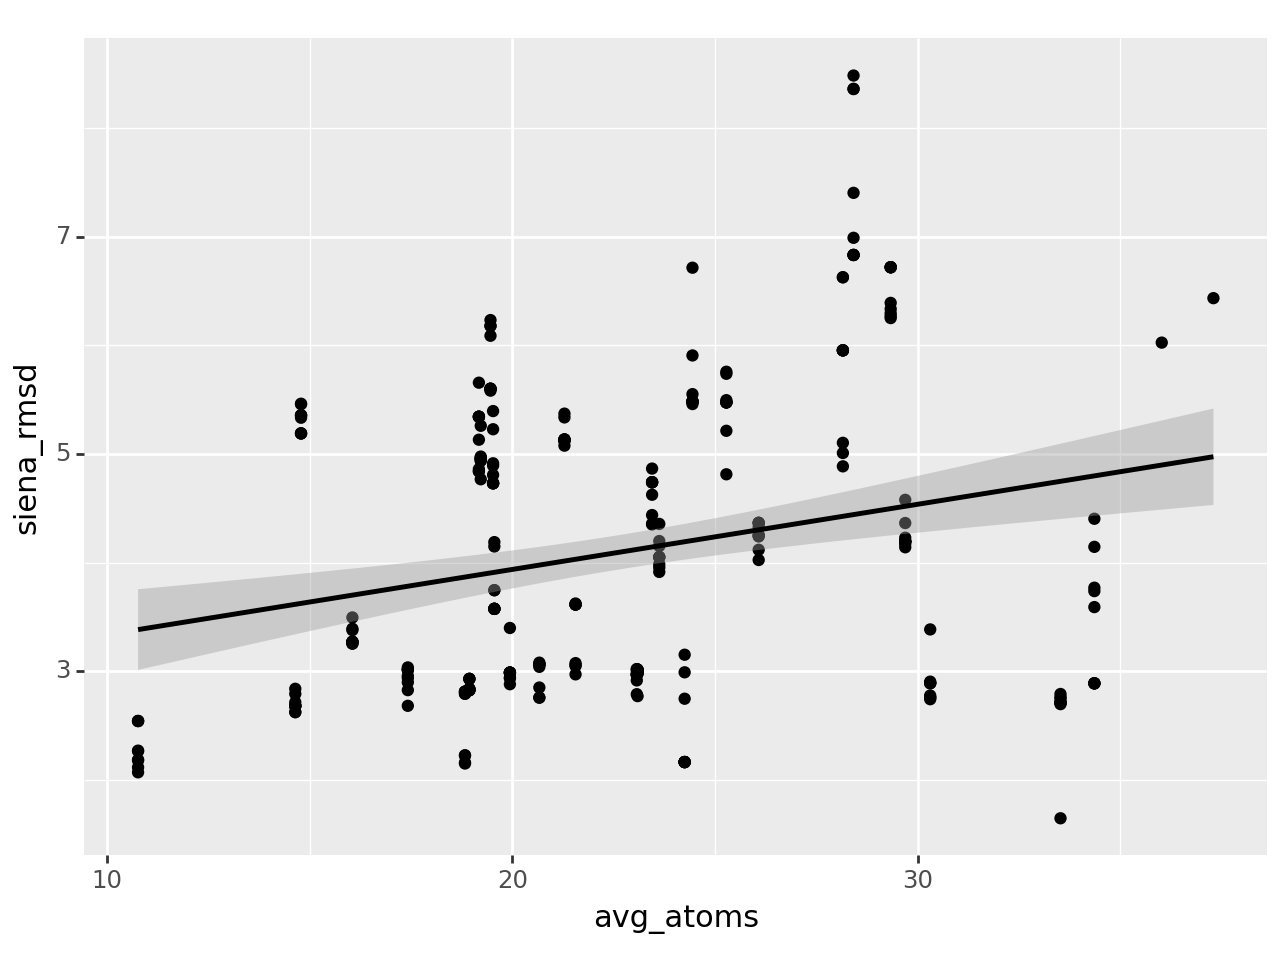

<Figure Size: (640 x 480)>

In [322]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))

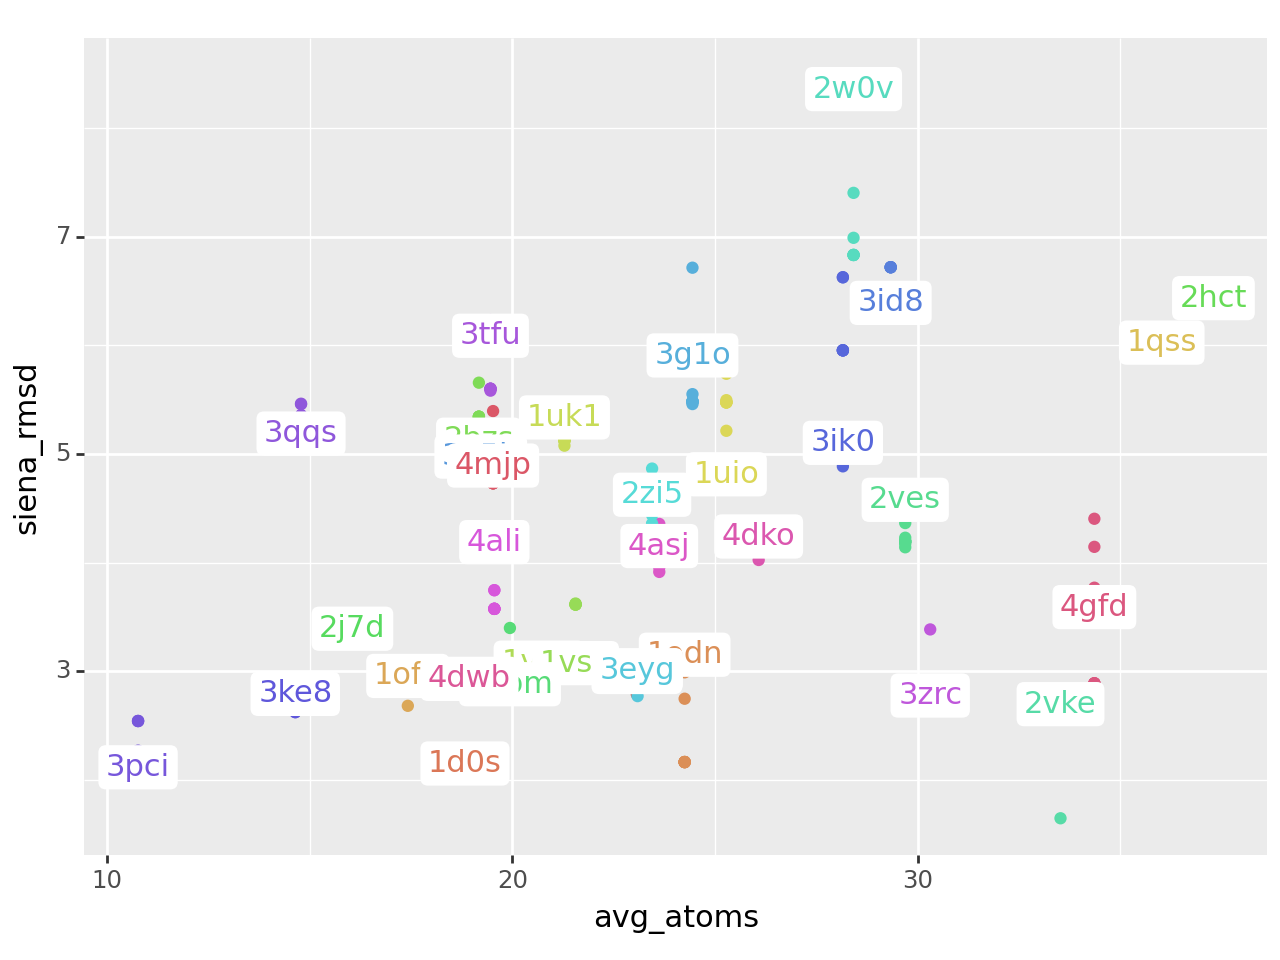

<Figure Size: (640 x 480)>

In [323]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


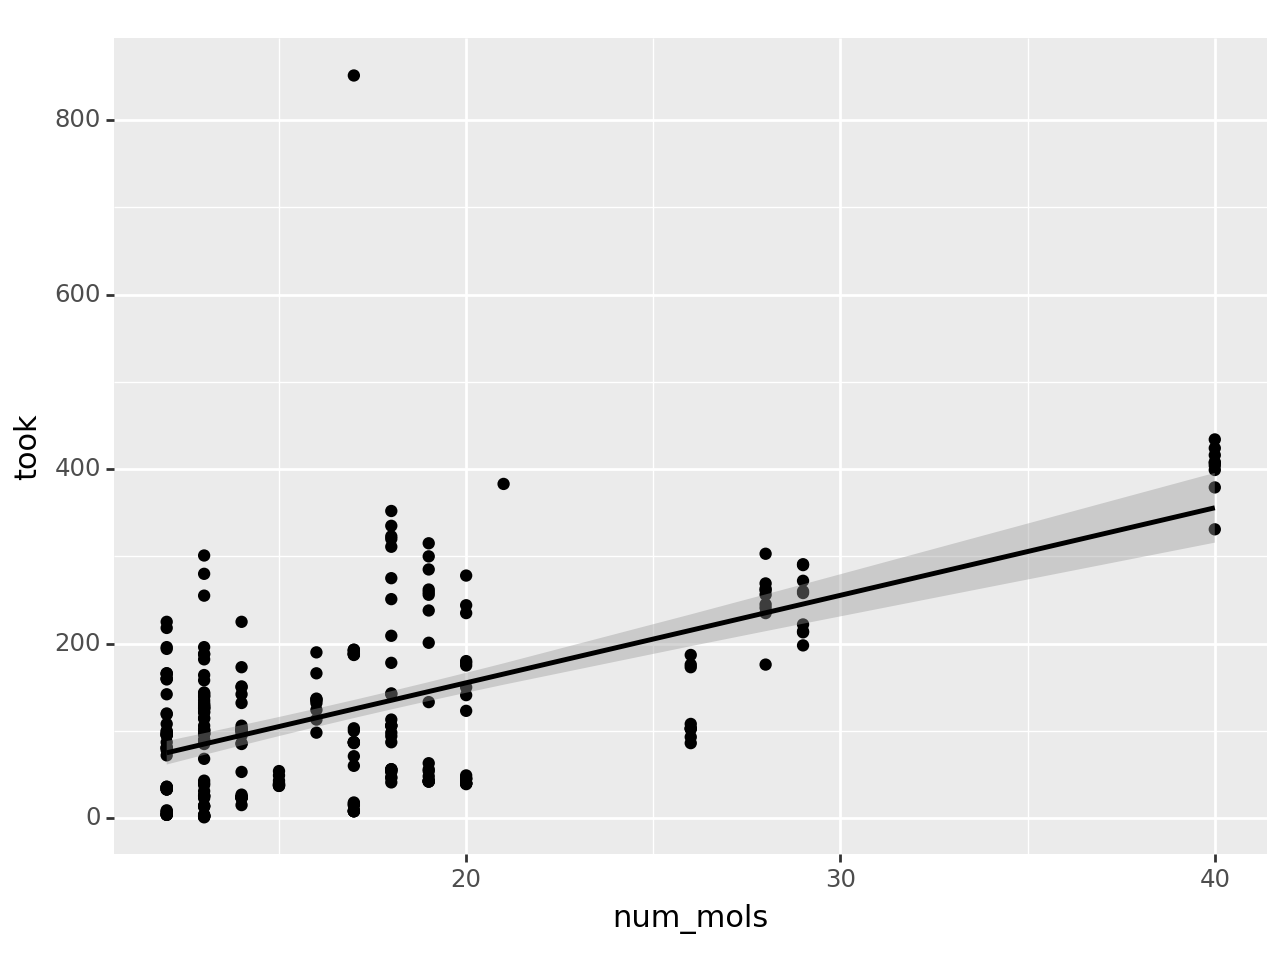

<Figure Size: (640 x 480)>

In [324]:
(ggplot(data=data, mapping=aes(x='num_mols', y='took'))
 + geom_point()
 + geom_smooth(method='lm'))

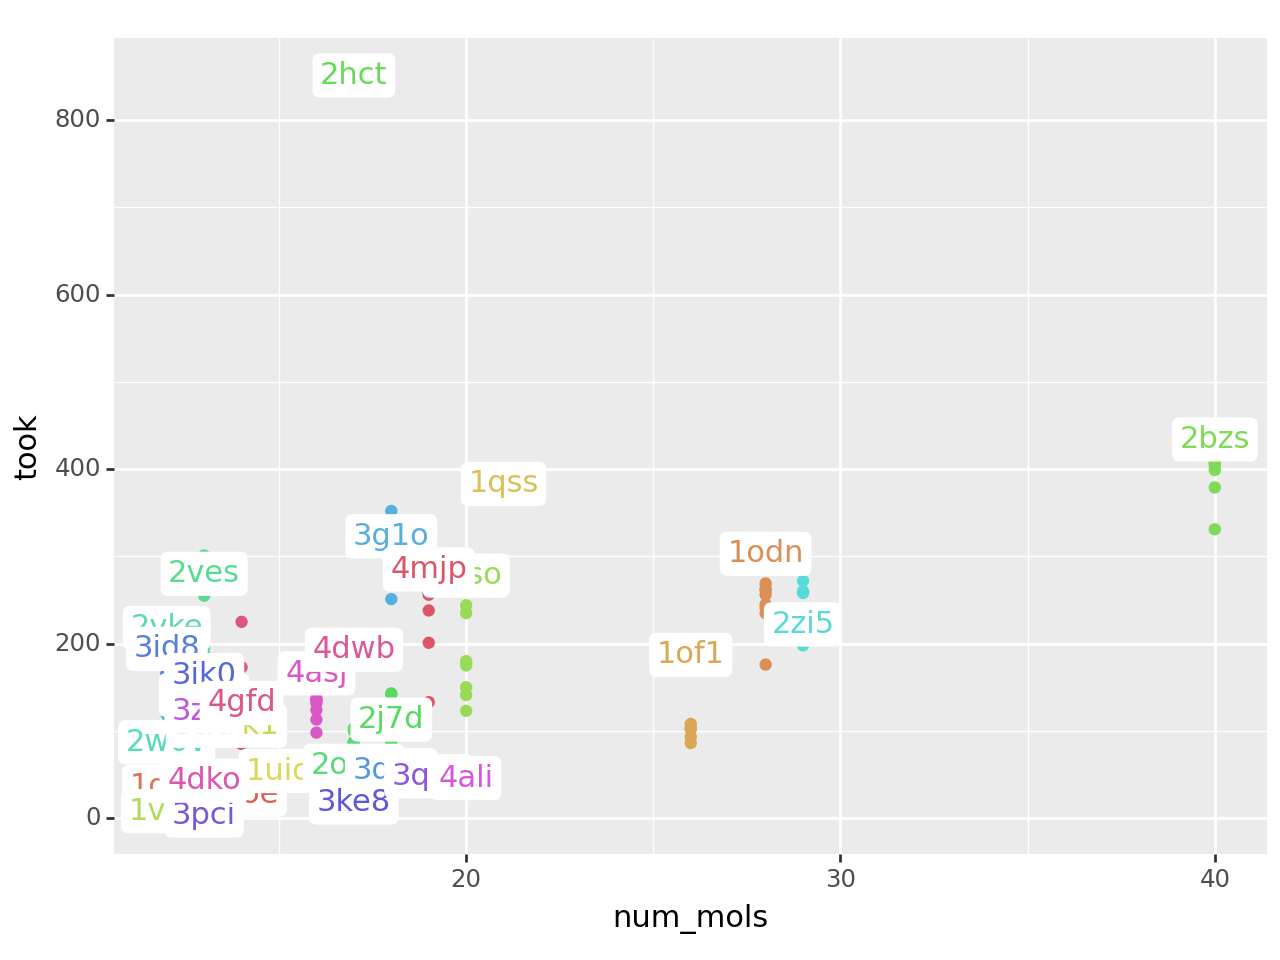

<Figure Size: (640 x 480)>

In [325]:
(ggplot(data=data, mapping=aes(x='num_mols', y='took', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )